## Experimento 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def mmq(x, y, f):
    """
    Encontrar os valores a e b que melhor aproximam a função genérica f(x):
    f(x) = c0 * f[0](x) + c1 * f[1](x) + ... + c{M-1} * f[M-1](x)
    aos pontos (x, y) dados, utilizando o Método dos Mínimos Quadrados Genérico.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
        f: funções de x genéricas.
    
    Returns:
        Retorna os valores dos coeficientes C no formato: [c0, c1, ..., c{M-1}].
    """
    
    # Definindo a matriz F
    F = np.ones((len(x), len(f)))
    for j in range(len(f)):
        F[:,j] = f[j](x)
    
    # Definindo a matriz à esquerda
    left = np.dot(F.transpose(), F)
    
    # Definindo o vetor à direita
    right = np.dot(F.transpose(), y)
    
    # Resolvendo o sistema linear para encontrar os valores dos coeficientes C
    C = np.linalg.solve(left, right)
    return C

Vamos definir um conjunto de funções $f_j(x)$ da base que queremos aranjar.

In [3]:
from numpy import sin, pi,cos
ks = 0.003125
B0 = 582.4

In [4]:
def f1(x):
    return cos(x)
def f2(x):
    return 1

f = [f1, f2]

In [18]:
#Dados do Experimento
Vs = np.array([4.30, 4.02, 3.30, 2.40, 1.399, 0.960, 0.670, 0.895, 1.491, 2.50, 3.41, 4.08,4.30]) #v
theta = np.array([cos(0), cos(pi/6), cos(2*pi/6), cos(3*pi/6), cos(4*pi/6), cos(5*pi/6), cos(6*pi/6), cos(7*pi/6), cos(8*pi/6), cos(9*pi/6), cos(10*pi/6), cos(11*pi/6), cos(2*pi)]) #V
print(theta)
#Bz = cos()*B0
Bz = theta*B0
# Bz = (Vs - 2.48)/ks
print("Bz",Bz)
# print(Bz)
# print(%.2Bz)

[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17
 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01
 -5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01
  1.00000000e+00]
Bz [ 5.82400000e+02  5.04373195e+02  2.91200000e+02  3.56617148e-14
 -2.91200000e+02 -5.04373195e+02 -5.82400000e+02 -5.04373195e+02
 -2.91200000e+02 -1.06985144e-13  2.91200000e+02  5.04373195e+02
  5.82400000e+02]


[1.82781414 2.45362968]
erro = 0.06008667180635637


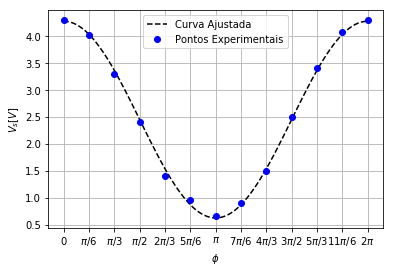

In [6]:
# plt.plot(x, fx, '-k')
x= (pi/6)*np.arange(0, 13)
y=Vs
# print(x)

C = mmq(x,y, f)
print (C)

#calculo do erro
fe = np.zeros((len(x)))
for j in range(len(f)):
    fe = fe + C[j] * f[j](x)
    
Erro =  np.sqrt(np.sum((y-fe)**2)/ len(y))
print("erro =",Erro)
    
X = np.linspace(-0.01, np.nanmax(x), 100)
# Z = np.linspace(4.9, 4.7, 100)
fx = np.zeros((len(X)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](X)


#Grafico    
plt.plot(X,fx , '--k',label="cosine")
# plt.plot(X,fx +Erro , '--y',label="cosine")
plt.plot(x,Vs , 'bo')
#Legendas
# plt.title('Dispersão $V_1 = 5V$ ')
plt.ylabel('$V_s [V]$')
plt.xlabel('$ \phi$')
plt.grid(True)
plt.legend(['Curva Ajustada','Pontos Experimentais'])
# plt.axis([0, np.nanmax(x)*1.1 , 0 , 5])
plt.xticks([ 0,pi/6,2*pi/6,3*pi/6,4*pi/6,5*pi/6,6*pi/6,7*pi/6,8*pi/6,9*pi/6,10*pi/6,11*pi/6, 2*pi],
          [ r'$0$',r'$\pi/6$', r'$\pi/3$', r'$\pi/2$', r'$2\pi/3$', r'$5\pi/6$', r'$\pi$', r'$7\pi/6$', r'$4\pi/3$', r'$3\pi/2$', r'$5\pi/3$', r'$11\pi/6$', r'$2\pi$'])
plt.axis('auto')
plt.show()

In [7]:
def line(x, y):
    """
    Encontrar os valores a e b que melhor aproximam a reta f(x) = ax + b
    aos pontos (x, y) dados, utilizando o Método dos Mínimos Quadrados.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
    
    Returns:
        Retorna os valores de a e b no formato: [a, b].
    """
    
    # Definindo a matriz à esquerda
    left = np.array([[np.sum(x*x), np.sum(x) ],
                     [np.sum(x)  , x.shape[0]]])
    
    # Definindo o vetor à direita
    right = np.array([[np.sum(x*y)],
                      [np.sum(y)  ]])
    
    # Resolvendo o sistema linear para encontrar os valores de a e b
    [a, b] = np.linalg.solve(left, right)
    return [a, b]

erro = 0.06008667180635635
[0.00313842] [2.45362968]
funcao [4.28144382 4.03656316 3.36753675 2.45362968 1.53972261 0.8706962
 0.62581554 0.8706962  1.53972261 2.45362968 3.36753675 4.03656316
 4.28144382]


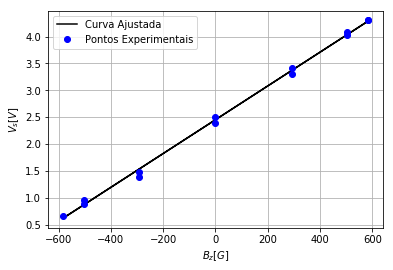

In [8]:
x = Bz
y = Vs
[a, b] = line(x, y)
f = a * x + b
#Grafico    
plt.plot(x, f, 'k')
plt.plot(x, y, 'bo')

# plt.plot(x, fx, '-k')
Erro =  np.sqrt(np.sum((y-f)**2)/ len(y))
print("erro =",Erro)
plt.legend(['Curva Ajustada','Pontos Experimentais'])

#Legendas
plt.ylabel('$V_s[V]$')
plt.xlabel('$B_z[G]$')
plt.grid(True)
print(a,b)
# plt.legend(['Pontos Experimentais'])
# plt.axis([0, 360 , 0 , 5])
print ("funcao",f)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYkAAAEOCAYAAAB8aOvdAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzt3Xd4lFXa+PHvnQIJRboxCCGga6EsgYDii4iAuojsWgAFcRcUjRRZy+urrLiwP5RFX0RQXARfXbBQRVBUWJYSNLiAhI5BpEOoUpSEEEi5f3/MMKRNMoFkWu7PdT1X5pznzDP3ySRzz3nKeURVMcYYY4oS4usAjDHG+C9LEsYYY9yyJGGMMcYtSxLGGGPcsiRhjDHGLUsSxhhj3LIkYYwxxi1LEsYYY9yyJGGMMcYtSxLGGGPcCvN1AJerbt26Ghsb61HbM2fOULVq1fINyIusP/4t2PoDwdenityfdevWHVfVeiW1C/gkERsbS3JyskdtV6xYwe23316+AXmR9ce/BVt/IPj6VJH7IyL7PGlnu5uMMca4ZUnCGGOMW5YkjDHGuBXwxySKkpWVRWpqKpmZmfnqa9SowbZt23wUVdmz/pS9iIgIGjRoQHh4uE/jMMZfBGWSSE1NpXr16sTGxiIirvq0tDSqV6/uw8jKlvWnbKkqJ06cIDU1lcaNG/ssDmNKMngwvPce5ORAaCgkJMCkSeXzWkG5uykzM5M6derkSxDGlEREqFOnTqERqDH+ZPBgePddR4IAx89333XUl4egTBKAJQhzSezvxvi7994rXf3lCtok4WtHjhyhd+/eXHPNNcTHx9OtWzd++uknr8cRFxdH796989WNGDGCpUuXlnpbe/fuZcaMGaV+Xv/+/Zk7d26pn2eMKezCCMLT+stlSaIcqCr3338/t99+O7t27WLdunWMGTOGo0ePeryNnDJ4x7dt20ZOTg5JSUmcOXPGVT9q1CjuuOOOUm/vUpOEMabshITkFlkfGlpOr1c+m63YEhMTCQ8PZ+DAga66li1b0qFDB1asWEH37t1d9U899RTTpk0DHFePv/jii7Ru3ZqxY8dy0003udrt3buXFi1aAI4P+bZt23LzzTeTkJCAqhYZx8yZM/njH//IXXfdxRdffOGqz/vNPjY2luPHjwOQnJzsulrzm2++IS4ujri4OFq1akVaWhrDhg0jKSmJuLg4xo8fz969e+nQoQOtW7emdevW/Oc//wEcSfKpp57i+uuv54477uDYsWOu174Qe/PmzYuN3RiT39mzZ6lZsya5uZOAwv83CQnl87pBeXZTXs888wwbN24EHN/OQ8sg3cbFxTFhwgS367du3Up8fPwlbbtOnTqsX78egFmzZrFnzx4aN27M7NmzeeihhwBHYhkxYgRpaWkMHjyYr776it///veFtjV79myWLFnCjz/+yMSJE3n44Yc9juONN97gH//4B+3btyc9PZ2IiAhee+013njjDb766isAMjIyWLJkCREREezYsYM+ffqQnJzM/Pnz2b59OykpKRw9epSmTZvy2GOP5Ysd4I9//KPb2I0xF33wwQc8/vjjztJQevZ8kPnzryx0dtOKFWX/2jaS8DMXEgHAgw8+yOzZswHyJYnExERuvvlm2rVrx/Lly/nhhx8KbSc5OZm6desSExNDly5d2LBhAydPnvQ4jvbt2/Pcc8/x9ttv88svvxAWVvj7RFZWFk888QQtWrSgV69epKSkAPDtt9/Sp08fQkNDqV+/Pp07d3Y950LsLVq0cBu7Mcbh1KlTiIgrQfTt2xdV5dNPryQ7G1QhO7v8Tn+FCjCSyPuN31vn4Tdr1sztgdqwsDBycy/uUyx4umXeGRwfeughevXqxQMPPICI8Jvf/IbMzEwGDx5McnIyNWvWZNy4cUWesjlz5kx+/PFHLsyQe/r0aT777DOeeOIJt/Hk3c6wYcO45557WLhwIe3bt2fx4sWFXmP8+PFERUWxadMmcnNziYiIKPb3kjf2hg0b8re//c1ONzXGjVdeecU16gbYtWsXTZo08XocNpIoB507d+bcuXO8l+ectM2bN5OUlESjRo1ISUnh3Llz/PLLLyxbtsztdq655hpCQ0N55ZVXXKOICx+qdevWJT09vchklJuby5w5c9iyZQt79+5l7969fPHFF8ycObNQ29jYWNatWwfAZ5995qrftWsXLVq04MUXX6Rt27b8+OOPVK9enbS0NFebX3/9lejoaEJCQvj4449dB9tvu+02Zs+eTU5ODocPHyYxMdHj2I2p6A4cOICIuBLEsGHDUFWfJAioACMJXxAR5s+fzzPPPMPrr79OREQEsbGxTJgwgYYNG/Lggw/SvHlzGjduTKtWrYrd1kMPPcT//M//sGfPHgBq1qzJE088QfPmzalXrx5t27Yt9JykpCSuvvpq6tev76q77bbbSElJ4fDhw64YAUaOHMmAAQP461//mm+K4QkTJpCYmEhISAjNmjXj7rvvJiQkhNDQUFq2bEn//v0ZPHgwPXr04KOPPqJr166uUdD999/P8uXLadq0KTExMdxyyy2FYr/qqquKjN2YiiwhIYH/+7//c5WPHTtGvXol3vKhfKlqQC/x8fFaUEpKSqE6VdXTp08XWR+oLrU/3bt31+XLl5dxNJfPX94fd38/pZWYmFgm2/EnwdYnf+nPli1bFMcpSwroxIkTL2k7pekPkKwefMba7qYK5rHHHiMjI4Nbb73V16EYUyFMnw6xsRAS4vg5ffrFdarK7373O9fp7eHh4aSnp/PUU0/5JNai2O6mCuaf//ynr0MwpsKYPt1xempGhqO8b9/F6xkaNvyWjh07utp++umn9OzZ0wdRFs+ShDHGlJPhwy8miAsyMqB//4NkZzsSxLXXXktKSorfTk9vu5uMMaac7N9fdH12djTguCf1jh07/DZBgA9GEiISCiQDB1W1e4F1lYGPgHjgBPCQqu71dozGGFMWateGEycK14eFpXH+fG5AzDrsi5HE04C7248NAE6p6rXAeOB1r0VljDFeUqNGjYBIEODlJCEiDYB7gPfdNLkX+ND5eC7QRQLlN1lAaGgocXFxNG/enF69epFRcMekh6ZNm8ahQ4cuO55p06ZRr14916R9cXFxrmk0ysvjjz9e7q8xYcIEj3633ojFmLyOHz/OiRNFz9haihlyfM7bI4kJwAtA0b85uBo4AKCq2cCvQJ3yDqq4U9QuVWRkJBs3bmTr1q1UqlSJyZMnX9J2yipJgOPCvI0bN7qWpk2blsl2i5KTk8P7779frq8BnicJb8RizAUvv/yy8yK4og9KxMR4N57L4bVjEiLSHTimqutE5PbL3FYCkAAQFRXFigJTH9aoUSPf9BEX5OTkFKqfMyeMoUMjOHvWMWDZtw+eeELJzMzkwQezLydM12u1bduWrVu3kpaWxjvvvMPHH38MwJ/+9CeGDBnCvn376NGjB7fccgtr1qwhOjqaWbNmsXjxYpKTk+nTpw+RkZEsXbqUNWvW8PLLL5OdnU2rVq2YMGEClStXZuTIkSxcuJCwsDA6d+7M6NGj88WSmZnJ+fPnC/X/yy+/5L333mPBggUcPXqUu+++m3/9618sXbqUL7/8ktOnT3Po0CEeeugh/vKXvwCO2WknT55MVlYWbdq04c033yQ0NJTo6GgeffRRVqxYwbhx43jllVd49dVXad26NdHR0QwYMIB///vfXHXVVYwYMYIRI0aQmprKa6+9Rrdu3Th//jxPP/00SUlJnD9/nieeeILHHnuMpKQkxowZQ506dUhJSSEuLo7333+fyZMnc+jQITp27EidOnX4+uuvefbZZ1m/fj1nz57l3nvvZfjw4QB069aNV199lZYtWzJkyBA2bNiAiPDII48UOic9MzOz0N/UpUhPTy+T7fiTYOtTWffnyJEj9OnTx1Xu0OFffP/9E5w7d3H26cqVc3jkke2sWHGsqE1clnJ5fzy54q4sFmAMkArsBY4AGcAnBdosBm5xPg4DjgNS3HYv94rrRo1UHXMp5l8aNSrmUkUPVK1aVVVVs7Ky9A9/+INOmjRJk5OTtXnz5pqenq5paWnatGlTXb9+ve7Zs0dDQ0N1w4YNqqraq1cv/fjjj1VVtWPHjrp27VpVVT179qw2aNBAt2/frqqqvXv31vHjx+vx48f1uuuu09zcXFVVPXXqVKF4pk6dqnXr1tWWLVu6loyMDFVV7du3r06cOFHvuecenTFjhqv9VVddpcePH9eMjAxt1qyZrl27VlNSUrR79+56/vx5VVUdNGiQfvjhh6qqCujs2bNdr5k3dkAXLlyoqqr33Xef3nnnnXr+/HnduHGjtmzZUlVV33rrLX3llVdUVTUzM1Pj4+N19+7dmpiYqFdccYUeOHBAc3JytF27dpqUlKSqqo0aNdKff/7Z9ZonTpxQVdXs7Gzt2LGjbtq0KV8sycnJescdd7jaF/W7siuu3Qu2PpVlf/70pz/lu2r6wt/iJ584Pk9EHD8/+aTMXrKQgL7iWlX/oqoNVDUW6A0sV9VHCjRbAPRzPu7pbFOud6Vxd4qau3pPnT17lri4ONq0aUNMTAwDBgxg5cqV3H///VStWpVq1arxwAMPkJSUBEDjxo2Ji4sDID4+nr179xba5vbt22ncuDHXXXcdAA8//DDffvstNWrUICIiggEDBjBv3jyqVKlSZEwFdzdFRkYCMHHiRMaMGUPlypXzfQu68847qVOnDpGRkTzwwAOsXLmSZcuWsW7dOtq2bUtcXBzLli1j9+7dgOM4TI8ePYp87UqVKtG1a1cAWrRoQceOHQkPD6dFixauvi5fvpyPPvqIuLg4br75Zk6cOMGOHTsAuOmmm2jQoAEhISHExcUV+fsBmDNnDq1bt6ZVq1b88MMPhY5DNGnShN27dzN06FD+9a9/ccUVVxS5HWM8tWnTJkSEjz76CIApU6agqtSuXRuAvn1h717IzXX87NvXd7FeCp9fTCcio3BktAXAB8DHIrITOIkjmZSrmBjHLqai6i/HhWMSnqpcubLrcWhoKGfPnvX4uWFhYXz//fcsW7aMuXPn8s4777B8+XKPn5+amkpISAhHjx4lNzeXkBDHd4eC5wyICKpKv379GDNmTKHtREREuL2pU3h4uGt7ISEhrv6GhISQne3YraeqTJw4kd/97nf5nrtixYpCv58Lz8lrz549vPHGG6xdu5ZatWrRv3//QlOR16pVi02bNrF48WImT57MnDlz7Cp0c0lyc3Pp3Lkz33zzDQDVq1fn6NGjri9fwcInF9Op6gp1XiOhqiOcCQJVzVTVXqp6rarepKq7yzuW0aOh4BfvKlUc9WWtQ4cOfP7552RkZHDmzBnmz59Phw4din1O3um5r7/+evbu3cvOnTsBx7GBjh07kp6ezq+//kq3bt0YP348mzZt8jim7OxsHnvsMWbOnMmNN97Im2++6Vq3ZMkSTp48ydmzZ/n8889p3749Xbp0Ye7cua5bkp48eZJ9RWXZS9ClSxfeffddsrKyAPjpp5/y3Zu7KHl/P6dPn6Zq1arUqFGDo0ePsmjRokLtjx8/Tm5uLj169ODVV1913QXQmNJITEwkNDTUlSC++OILTp8+HXQJAvxgJOFrF4Z+w4c7djHFxDgSRHkMCVu3bk3//v1d965+/PHHadWqldtdJ+C4H/XAgQOJjIxk1apVTJ06lV69epGdnU1cXBwDBw7k5MmT3HvvvWRmZqKq+T7o85o9ezYrV650lSdNmsTSpUvp0KEDt956Ky1btqRt27bcc889gGMXT48ePUhNTeWRRx6hTZs2ALz66qvcdddd5ObmEh4ezj/+8Q8aNWp02b+ffv36ceTIEVq3bo2qUq9ePT7//PNin5OQkEDXrl2pX78+iYmJtGrVihtuuIGGDRvSvn37Qu0PHjzIo48+6rrRUlEjImPcycrK4rrrrnP9zzZv3pwNGzYUeefGoOHJgQt/Xmyq8PIxdepUHTJkSLltvyj+8v7YgWv3gq1PpenPrFmz8h2YXrlyZfkFdonK48B1EKc/Y4y5fGlpaflOcOjevTsLFiwImCumL5dN8GeK1L9/f9555x1fh2GMT02YMCFfgkhJSeHLL7+sMAkC7JiEMcYUcvToUa666ipXedCgQUyaNMmHEflO0I4ktHwvrzBByv5uzAsvvJAvQaSmplbYBAFBmiQiIiI4ceKE/cObUlFVTpw4QUREhK9DMT6wa9cuRISxY8cC8Pe//x1V5eqrr/ZxZL4VlLubGjRoQGpqKj///HO++szMzKD6ALD+lL2IiAgaNGjg0xiMd6kqffr0Yfbs2a66U6dOUbNmTR9G5T+CMkmEh4fTuHHjQvUrVqygVatWPoiofFh/jLk827dvp1OnTq7ytGnT6NevXzHPqHiCMkkYY0xxcnNzad++PatXrwagXr167N+/3+cjWX8UlMckjDHGncWLFxMaGupKEAsXLuTYsWOWINywJGGMqRDOnTtHdHS0azbiNm3asHTpUu6++24fR+bfLEkYY4LeJ598QkREBEeOHAFgzZo1rF271u2sxeYiOyZhjAlap0+fpkaNGq5yz549mTNnToW6Yvpy2UjCGBOUxo4dmy9B/PTTT3z66aeWIErJRhLGmKBy+PBh6tev7yo/++yzbqfPNyWzJGGMCRrPPPMMb731lqt8+PDhfFNsmNKz3U3GmIC3fft2RMSVIMaNG4eqWoIoA14bSYhIBPAtUNn5unNVdWSBNv2BscBBZ9U7qvq+t2I0xgQWVeX+++/niy++cNWdPn2a6tWr+zCq4OLNkcQ5oLOqtgTigK4i0q6IdrNVNc65WIIwxhRp9erVhISEuBLEjBkzUFVLEGXMayMJ5+3y0p3FcOdi07QaY0olJyeHNm3asHHjRsAxoeeuXbuoVKmSjyMLTuLN6bRFJBRYB1wL/ENVXyywvj8wBvgZ+Al4VlUPFLGdBCABICoqKn7WrFkevX56ejrVqlW7nC74FeuPfwu2/oDv+7Rq1SpeeuklV/mNN94gPj7+krfn6/6UtdL0p1OnTutUtU2JDT25EXZZL0BNIBFoXqC+DlDZ+fhJYHlJ24qPj/f4xt8V+SbugcD64/981aezZ89qrVq1FMfeB7311ls1JyfnsrcbbO9RafoDJKsHn9c+ObtJVX9xJomuBepPqOo5Z/F94NK/IhhjAsb06RAbCyEhjp/Tp19cN3XqVCIjIzl16hQA69evJykpiZAQOznTG7x5dlM9IEtVfxGRSOBO4PUCbaJV9bCz+Adgm7fiM8b4xvTpkJAAGRmO8r59jvKZM+k8+eTFg9B9+/blk08+8VGUFZc3L6aLBj50HpcIAeao6lciMgrHsGcB8GcR+QOQDZwE+nsxPmOMDwwffjFBXJCRAU8+edxV3rVrF02aNPFyZAa8e3bTZqDQbcdUdUSex38B/uKtmIwxvrd/v7s1MQwbNowxY8Z4MxxTgO3UM8b4VExM0fUNGqglCD9gScIY41ODB6cCZ/LVVakCr71m93rwB5YkjDE+oap069aNF19sCEzFcShSCQ2Ffv2gb18fB2gASxLGGB/47rvvCAkJYdGiRUAfKlUaiOMQqZCTAx9+mP80WOM7liSMMV6TnZ1Ns2bNuPXWWwG49tpriYmZzvnz+c+hychwnPVkfM+ShDHGKz7//HPCw8NJSUkBYMWKFezYsYMDB4q+U5z7s56MN9lNh4wx5SojI4N69eqR4bwYokuXLixZssR1G9GYGMcFdAW5O+vJeJeNJIwx5WbKlClUrVrVlSA2bdrE0qVL891nevRox9lMeVWp4qg3vmcjCWNMmTtx4gR169Z1lQcMGMD77xd9e5gLZzENH+7YxRQT40gQdnaTf7AkYYwpUyNHjmTUqFGu8r59+4gpYd9R376WFPyV7W4yxpSJffv2ISKuBDFy5EhUtcQEYfybjSSMMZft0UcfZdq0aa7yiRMnqF27tu8CMmXGRhLGmEu2efNmRMSVIKZMmYKqWoIIIjaSMMaUmqrSpUsXEhMTAahWrRpHjx6lSsHTlEzAs5GEMaZUVqxYQUhIiCtBfP7556SlpVmCCFI2kjDGeCQrK4uHH36Yw4cdN49s3rw5GzZsICzMPkaCmY0kjDElmjNnDpUqVXIliJUrV7JlyxZLEBWAvcPGGLfS09OpUaMGubm5ALRr147//Oc/+a6YNsHNayMJEYkQke9FZJOI/CAi/6+INpVFZLaI7BSRNSIS6634jDH5TZw4kerVq7sSREpKCmPGjLEEUcF4c3fTOaCzqrYE4oCuItKuQJsBwClVvRYYD7zuxfiMMcCxY8cQEf785z8DMGjQIFSVG2+80ceRGV/wWpJQh3RnMdy5aIFm9wIfOh/PBbqIfW0xxmuGDRtGVFSUq3zgwAEmTZrkw4iMr4lqwc/pcnwxkVBgHXAt8A9VfbHA+q1AV1VNdZZ3ATer6vEC7RKABICoqKj4WbNmefT66enpVKtW7bL74S+sP/4tkPpz6NAh+uaZPGnAgAE88sgjhdoFUp88UZH706lTp3Wq2qbEhqrq9QWoCSQCzQvUbwUa5CnvAuoWt634+Hj1VGJiosdtA4H1x78FSn/69OmjOEb1CuipU6fctg2UPnmqIvcHSFYPPq99cgqsqv7iTBJdC6w6CDQEEJEwoAZwwrvRGVMxrF+/HhFh5syZAEydOhVVpWbNmj6OzPgTr50CKyL1gCxV/UVEIoE7KXxgegHQD1gF9ASWOzOeMaaM5Obm0r59e1avXg1AnTp1SE1NJSIiwseRGX/kzZFENJAoIpuBtcASVf1KREaJyB+cbT4A6ojITuA5YJgX4zMm6C1ZsoTQ0FBXgvj66685fvy4JQjjltdGEqq6GWhVRP2IPI8zgV7eismYiuLcuXM0btzYdcV069at+f777wkNDfVxZMbf2bQcxgS56dOnExER4UoQq1evZt26dZYgjEdsWg5jgtTp06epUaOGq/zAAw8wd+5cu2LalIqNJIwJQuPGjcuXILZv385nn31mCcKUmo0kjAkihw8fpn79+q7yM888w/jx430YkQl0liSMCRLPPPMMb731lqt86NAhoqOjfRiRCQa2u8mYAPfTTz8hIq4EMXbsWFTVEoQpEzaSMCZAqSo9evRg/vz5rrpff/2VK664wodRmWBjIwljAtCaNWsICQlxJYhPPvkEVbUEYcqcjSSMCSA5OTm0bduWDRs2AFC/fn12795N5cqVfRyZCVY2kjAmQHz99deEhYW5EsS///1vDh48aAnClCsbSRjj5zIzM6lfvz6nTp0C4L/+679ISkoiJMS+45nyZ39lxvixqVOnEhkZ6UoQycnJfPfdd5YgjNeUOJIQkdoebCfXeY8IY0wZOHXqFLVrX/zX69OnDzNmzPBhRKai8mR30yHnUtz1/KFATJlEZEwFN3r0aF5++WVXeefOnVxzzTU+jMhUZJ4kiW2qWmiK77xEZEMZxWNMhZWamkrDhg1d5RdeeIHXXy94Xy5jvMuTJPGwB21uudxAjKnIBg0axOTJk13lo0ePcuWVV/owImMcPDn69bWITBURt7uTnDcLMsaUUkpKCiLiShBvv/02qmoJwvgNT5LEDcB64BsRect5r+pSE5GGIpIoIiki8oOIPF1Em9tF5FcR2ehcRhS1LWMCnarSrVs3mjVrBkBoaChpaWkMHTrUx5EZk1+JSUJVz6vqROBG4ADwvYi8IiKlvf4/G/hvVW0KtAOGiEjTItolqWqccxlVytcwxuemT4fYWOjcuSOxsY5yXitXriQkJIRFixYBMGfOHLKzs6lWrZrXYzWmJB6fbK2qmar6BtAcOAusE5HnS/H8w6q63vk4DdgGXF3KeI3xa9OnQ0IC7NsHqsK+fY7y9OmQnZ1N06ZN6dChAwBNmjTh/Pnz9Oplt3U3/svjJCEisSLSFXgcx+muacDfL+VFRSQWaAWsKWL1LSKySUQWiUizS9m+Mb4yfDhkZOSvy8iAZ5/NIDw8nG3btgGwfPlydu3aRXh4uA+iNMZzoqrFNxDZjOMb/37gRxwjgAvLT6p6vlQvKFIN+AYYrarzCqy7AseFeeki0g14S1V/U8Q2EoAEgKioqPhZs2Z59Nrp6elBNaS3/vifzp07olrUJUW5QCitWrVi3LhxAXsb0WB4j/KqyP3p1KnTOlVtU2JDVS12AZrgTCaXuwDhwGLgOQ/b7wXqFtcmPj5ePZWYmOhx20Bg/fE/jRqpQlHLHt24caOvw7tswfAe5VWR+wMkqwefw54cuN7t3OBlEcdXpw9wXJz3pps2VznbISI34dgdduJyX9sYbxk9GiIj8/+7hIae45NPYmnZsqWPojLm0nkyd9N6VW19uW2A9sAfgS0istFZ9xLO6TxUdTLQExgkItk4Do73LosEZYy3bN8+grNnrwQGAqGEhkJCQmX69vV1ZMZcGk+uuL7ReVzCHQFqlLQRVV1J8fM/oarvAO94EJMxfmXfvn3ExsYCfYAXufCvlZMDH34I7dtjicIEJE+SxA0etMm53ECMCVSPPvoo06ZNc5b+DlTNtz4jw3HWkyUJE4hKTBKquq9gnYh0VtXlIhINHFNVSxKmwtm8eXO+4wzvvvsugwfHUtQO0v37vRiYMWXoUu9c0lVEGgCTgfFlGI8xfk9V6dy5sytBVKlShTNnzjBw4EBi3Mxw5q7eGH9XYpIQkRuLqK6JY8frC8C5sg7KGH+1YsUKQkJCSExMBGD+/PmcOXOGKlWqAI6zm5wPXapUcdQbE4g8OSbxtYh8A4xU1QuD5lHADaq6XURsV5MJellZWVx//fXs2bMHgBtvvJHNmzcTFpb/X+jCcYfhw2H/fiUmRhg92o5HmMB1SbPAqmqqqi4FUNVh5RqhMT42Z84cKlWq5EoQSUlJpKSkFEoQF/TtC3v3wvLl37B3ryUIE9i8OQusMQElPT2d0NBQHnroIQC6du1Kbm4ut956q48jM8Z7vDYLrDGBZOLEiVSvXp3c3FwAtm7dyqJFiwJ2ziVjLpUnxyQA18ytNwDXk38W2DfKIzBjfOHnn3/Od1e4J598Mt9tRY2paDw5u2mziJwA5gP9cFxdvQz4ExA80yeaCm/YsGH5EsTrqkS5AAAVMklEQVSBAwcsQZgKz5ORxH3AHptDyQSr3bt3c80117jKr776KsOHD/dhRMb4D0+uuN7tjUCM8YWHH36YmTNnusonT56kVq1aPozIGP9yqVdcGxPQ1q9fj4i4EsQHH3yAqlqCMKYAjw9cGxMMLpzCumrVKgBq1arFwYMHiYyM9HFkxvgnG0mYCmPJkiWEhoa6EsSXX37JyZMnLUEYUwwbSZigd+7cOZo0acKhQ4cAaNWqFWvXriU0NNTHkRnj/2wkYYLa9OnTiYiIcCWI1atXs379eksQxnjIRhImKJ0+fZoaNS7eMPG+++5j3rx5dsW0MaXktZGEiDQUkUQRSRGRH0Tk6SLaiIi8LSI7nRfxlXTfbGMKGTduXL4E8eOPPzJ//nxLEMZcAm+OJLKB/1bV9SJSHcfcT0tUNSVPm7uB3ziXm4F3nT+NKdGRI0eIjo52lYcOHcrbb7/tw4iMCXxeG0mo6mFVXe98nAZsA64u0Oxe4CN1WA3UdN4i1ZhiPfvss/kSxKFDhyxBGFMGfHLg2jlZYCtgTYFVV+OYjvyCVAonEmNcfvrpJ0SECRMmADB27FhUNV/CMMZcOvH2lEwiUg34BhitqvMKrPsKeE1VVzrLy4AXVTW5QLsEIAEgKioqftasWR69dnp6OtWqBc+chBW5P6rKyJEjSUpKctV9+eWXfvX7CLb3B4KvTxW5P506dVqnqm1KbKiqXluAcGAx8Jyb9VOAPnnK24Ho4rYZHx+vnkpMTPS4bSCoqP1ZvXq1Aq7l448/Lt/ALlGwvT+qwdenitwfIFk9+Nz22oFrcZxa8gGwTVXfdNNsAfCUiMzCccD6V1U97K0YjX/LycnhpptuYv369QBER0ezZ88eKleu7OPIjAle3jwm0R74I9BZRDY6l24iMlBEBjrbLAR2AzuB/wMGezE+48cWLlxIWFiYK0EsXryYQ4cOWYIwppx5bSShjuMMxZ6o7hwCDfFORCYQZGZmcvXVV3Py5EkA2rVrx3fffUdIiE0WYIw32H+a8VtTp04lMjLSlSCSk5NZtWqVJQhjvMim5TB+59SpU9SuXdtV7t27NzNmzLArpo3xAftKZvzK3//+93wJYseOHcycOdMShDE+YiMJ4xcOHjxIp06dXOXnn3+esWPH+jAiYwxYkjB+YPDgwbz77ruu8pEjR4iKivJhRMaYC2x3k/GZlJQURMSVIIYMGYKqWoIwxo9YkjBep6p069aNZs2aASAipKWl0bNnTx9HZowpyJKE8aoL1zgsWrQIgNmzZ5ObmxtU8+cYE0zsmITxiuzsbFq2bElKiuP2IbGxsWzfvp1KlSr5ODJjTHFsJGHK3RdffEF4eLgrQSxbtow9e/ZYgjAmANhIwpSbjIwMrrzySs6cOQPA7bffzrJly+yKaWMCiP23mnIxZcoUqlat6koQGzduJDEx0RKEMQHGRhKmTJ04cYK6deu6yv369WPatGm+C8gYc1nsa50pMyNHjsyXIPbs2WMJwpgAZyMJc9n27dtHbGysq/zyyy/zyiuv+C4gY0yZsSRhLsuAAQP45z//6Sr//PPP+UYTxpjAZrubzCXZsmULIuJKEJMmTUJVLUEYE2RsJGFKRVW54447WL58OQCRkZEcP36cKlWq+DgyY0x58NpIQkT+KSLHRGSrm/W3i8ivee5/PcJbsRnPrFixgpCQEFeCmDdvHhkZGZYgjAli3hxJTAPeAT4qpk2Sqnb3TjjGU1lZWdxwww3s3r0bgBtuuIEtW7YQFmYDUWOCnddGEqr6LXDSW69nysbcuXOpVKkfu3cvA3KIijrLyy9vswRhTAXhb//pt4jIJuAQ8Lyq/uDrgCqq9PR0atasSU7Og8D/AVUBOHo0goQER5u+fX0WnjHGS0RVvfdiIrHAV6ravIh1VwC5qpouIt2At1T1N262kwAkAERFRcXPmjXLo9dPT08Pqimpy6s/8+fP5+2333aW9gCxhdpERWUya9bqMn1de3/8X7D1qSL3p1OnTutUtU2JDVXVawuOT5utHrbdC9QtqV18fLx6KjEx0eO2gaCs+3Ps2DEFXEtCQoKKqELhRaRMX1pV7f0JBMHWp4rcHyBZPfgs9pvrJETkKhER5+ObcBwvOeHbqCqOYcOGceWVV7rK+/fvZ8qUKcTEFN3eXb0xJrh48xTYmcAq4HoRSRWRASIyUEQGOpv0BLY6j0m8DfR2ZjtTjnbv3o2I8PrrrwMwatQoVJWGDRsCMHo0FLztQ6VKjnpjTPDz2oFrVe1Twvp3cJwia7ykb9++zJgxw1U+efIktWrVKtSuYKq21G1MxeE3u5uM92zYsAERcSWI999/H1UtMkEMHw5ZWfnrsrIc9caY4Odvp8CacpSbm8ttt93Gd999B0CtWrU4ePAgkZGRbp+zf3/p6o0xwcVGEhXE0qVLCQ0NdSWIL7/8kpMnTxabIMD9AWo7cG1MxWBJIsidP3+eBg0acOeddwIQFxdHdnY23bt7NvvJ6NFQcGqmKlXswLUxFYUliSA2Y8YMKleuzMGDBwFYtWoVGzZsIDQ01ONt9O0L770HjRqBiOPne+/Z1dbGVBR2TCIInT59mho1arjK9913H/PmzcN5GUqp9e1rScGYispGEkFm3Lhx+RLEjz/+yPz58y85QRhjKjYbSQSJI0eOEB0d7SoPHTo0z/xLxhhzaWwkEQSee+65fAni0KFDliCMMWXCRhIB7MCBA/l2I73++uu88MILPozIGBNsLEkEIFWlZ8+ezJs3z1X3yy+/5DsWYYwxZcF2NwWY77//npCQEFeC+Pjjj1FVSxDGmHJhSSJA5OTk0KZNG26++WYAoqOjWbx4MY888oiPIzPGBDNLEgFg0aJFhIWFsW7dOgAWL17MoUOHqFRwDm9jjCljdkzCj2VmZtKwYUOOHz8OQLt27fjuu+8ICbHcbozxDvu08VMffvghkZGRrgSxdu1aVq1aZQnCGONVNpLwM7/88ku++zr07t2bGTNm2BXTxhifsK+lfmTMmDH5EsSOHTuYOXOmJQhjjM948x7X/xSRYyKy1c16EZG3RWSniGwWkdbeis3XDh48iIjw0ksvAfD888+jqlx77bU+jswYU9F5cyQxDehazPq7gd84lwTgXS/E5HNDhgyhQYMGrvKRI0cYO3asDyMyxpiLvJYkVPVb4GQxTe4FPlKH1UBNEYkupn1A27ZtGyLCpEmTAJgwYQKqSlRUlI8jM8aYi/zpmMTVwIE85VRnXUCYPh1iYyEkxPFz+vSi26kqv//972natCkAIkJaWhpPP/2012I1xhhPiap678VEYoGvVLV5Eeu+Al5T1ZXO8jLgRVVNLqJtAo5dUkRFRcXPmjXLo9dPT0+nWrVqlxy/O0uXXskbb1zPuXMX7/hWuXIOzz+/nTvuOOaq27p1K0OHDnWVR4wYQadOnS75dcurP75i/fF/wdanityfTp06rVPVNiU2VFWvLUAssNXNuilAnzzl7UB0SduMj49XTyUmJnrctjQaNVKFwkujRo71WVlZ2qxZMwUU0NjYWD137txlv2559cdXrD/+L9j6VJH7AySrB5/b/rS7aQHwJ+dZTu2AX1X1sK+D8sT+/e7rFyxYQHh4OD/88AMAy5YtY8+ePTalhjEmIHjtYjoRmQncDtQVkVRgJBAOoKqTgYVAN2AnkAE86q3YLldMDOzbV9Sa/dx7770A3H777SxbtsyumDbGBBSvJQlV7VPCegWGeCmcMtWtG7xb6IRdRXUBABs3bqRly5Zej8sYYy6XTctRBhYuLKpWqFq1N+npT3k7HGOMKTO276MMuDsmkZFR17uBGGNMGbMkcZn279+P6t4i18XEeDcWY4wpa5YkLsPjjz9Oo0aNgJeAM/nWVakCo0f7JCxjjCkzdkziEmzZsoXf/va3rvK7795G9epVGT7csespJsaRIPr29WGQxhhTBixJlIKqctddd7F06VIA102BqlSpAlhSMMYEH9vd5KFvvvmGkJAQV4KYN28eGRkZrgRhjDHByEYSJcjKyqJp06bs3LkTgBtuuIEtW7YQFma/OmNM8LORRDHmzp1LpUqVXAni22+/Zdu2bZYgjDEVhn3aFeHMmTPUrFmT7OxsALp27crChQvtNqLGmAqnQo4kirv3wzvvvEO1atVcCWLr1q0sWrTIEoQxpkKqcCOJ6dMhIQEyMhzlffsc5bS00wwaVMPVLiEhgSlTpvgoSmOM8Q8VLkkMH34xQVyQkQGDBl28s+r+/ftp2LChlyMzxhj/U+F2N7mbZwliGDVqFKpqCcIYY5wqXJJwN59SgwbKX//6V+8GY4wxfq7CJYnRox3zKuVVpQq89lpo0U8wxpgKrMIlib594b33oFEjEHH8fO89m1LDGGOKUuEOXIMjIVhSMMaYknl1JCEiXUVku4jsFJFhRazvLyI/i8hG5/K4N+MzxhiTn9dGEiISCvwDuBNIBdaKyAJVTSnQdLaq2j0/jTHGD3hzJHETsFNVd6vqeWAWcK8XX98YY0wpeTNJXA0cyFNOddYV1ENENovIXBGxCxaMMcaHRFW980IiPYGuqvq4s/xH4Oa8u5ZEpA6QrqrnRORJ4CFV7VzEthKABICoqKj4WbNmeRRDeno61apVu/zO+Anrj38Ltv5A8PWpIvenU6dO61S1TYkNVdUrC3ALsDhP+S/AX4ppHwr8WtJ24+Pj1VOJiYketw0E1h//Fmz9UQ2+PlXk/gDJ6sFntzd3N60FfiMijUWkEtAbWJC3gYhE5yn+AdjmxfiMMcYU4LWzm1Q1W0SeAhbjGCX8U1V/EJFRODLaAuDPIvIHIBs4CfQvabvr1q07LiL7PAyjLnD8kjrgn6w//i3Y+gPB16eK3J9GnjTy2jEJfyAiyerJPrgAYf3xb8HWHwi+Pll/SlbhpuUwxhjjOUsSxhhj3KpoSeI9XwdQxqw//i3Y+gPB1yfrTwkq1DEJY4wxpVPRRhLGGGNKIWiThIgMFZEfReQHEfnfPPV/cc5Cu11EfpenvtgZav2BiPy3iKiI1HWWRUTedsa8WURa52nbT0R2OJd+vou6aCIy1vn+bBaR+SJSM8+6gH2PLgikWC8QkYYikigiKc7/m6ed9bVFZInzb2mJiNRy1rv9+/MnIhIqIhtE5CtnubGIrHHGPdt53RYiUtlZ3ulcH+vLuN0RkZrOaYt+FJFtInJLub5HnlxxF2gL0AlYClR2lq90/mwKbAIqA42BXTiu2Qh1Pm4CVHK2aerrfhToU0Mc15jsA+o667oBiwAB2gFrnPW1gd3On7Wcj2v5ug8F+nMXEOZ8/DrweqC/R3n6FjCxFog7GmjtfFwd+Mn5fvwvMMxZPyzPe1Xk35+/LcBzwAzgK2d5DtDb+XgyMMj5eDAw2fm4N44ZqX0efxH9+RB43Pm4ElCzPN+jYB1JDAJeU9VzAKp6zFl/LzBLVc+p6h5gJ47ZaQNhhtrxwAtA3oNI9wIfqcNqoKbzqvXfAUtU9aSqngKWAF29HnExVPXfqprtLK4GGjgfB/J7dEEgxeqiqodVdb3zcRqOGQ+uxhH7h85mHwL3OR+7+/vzGyLSALgHeN9ZFqAzMNfZpGB/LvRzLtDF2d5viEgN4DbgAwBVPa+qv1CO71GwJonrgA7OIeM3ItLWWe9uJlpPZ6j1CRG5FzioqpsKrArI/hThMRzfdiA4+hRIsRbJuaulFbAGiFLVw85VR4Ao5+NA6OcEHF+ucp3lOsAveb6g5I3Z1R/n+l+d7f1JY+BnYKpzF9r7IlKVcnyPAvb2pSKyFLiqiFXDcfSrNo7hVVtgjog08WJ4pVZCf17CsXsmoBTXJ1X9wtlmOI5pWKZ7MzbjnohUAz4DnlHV03m/TKuqikhAnBIpIt2BY6q6TkRu93U8ZSQMaA0MVdU1IvIWjt1LLmX9HgVsklDVO9ytE5FBwDx17JT7XkRyccxpchDHvv0LGjjrKKbeK9z1R0Ra4Pj2sMn5z9oAWC8iN+G+PweB2wvUryjzoEtQ3HsEjtvVAt2BLs73Cvz4PSqF4vrg10QkHEeCmK6q85zVR0UkWlUPO3dVXNh96+/9bA/8QUS6ARHAFcBbOHa5hDlHC3ljvtCfVBEJA2oAJ7wfdrFSgVRVXeMsz8WRJMrvPfL1QZjyWICBwCjn4+twDLcEaEb+g6K7cRxkDHM+bszFA43NfN0PN33by8UD1/eQ/6DU98762sAeHAetazkf1/Z17AX60RVIAeoVqA+G9yhgYi0QtwAfARMK1I8l/0HR/y3u788fFxxfmi4cuP6U/AeuBzsfDyH/ges5vo7bTV+SgOudj//mfH/K7T3yeYfL6ZdYCfgE2AqsBzrnWTccx5kn24G789R3w3E2xy4cu0N83g83fcubJATHfcN3AVuANnnaPYbjoO9O4FFfx11EP3biSN4bncvkYHmPAi3WPDHfiuPEiM153pduOPbLLwN24DhrsHZJf3/+thRIEk2A751/g59y8SzICGd5p3N9E1/H7aYvcUCy8336HMcXwXJ7j+yKa2OMMW4F69lNxhhjyoAlCWOMMW5ZkjDGGOOWJQljjDFuWZIwxhjjliUJY4wxblmSMMYY45YlCWNKQUSeFJHDIrLROUf/5xfuR5CnTayInBWRjQXqfyciSSKSLCJbRGSaiNQVkUjn9s6L814hxvgLSxLGlE4L4CVVjcMx5Utz4LdFtNvlbAOAiPTCMed/P1Vtg+Oq2R1AhKqedbY9VO7RG1NKATvBnzE+8luc9yYArsUx7cFPxT3BOZXzRBwTGe4GUNUcYHQ5xmlMmbAkYUzpNAM+cs6WejXQXVVPl/CcbsAmVf2h3KMzpozZ7iZjPCQiDXHcn+C3qnoj8BTwVw+e2gzHZJMXtvO2iGwVkdXlFKoxZcaShDGea4FjevMLNgFXikiMiLwqItNFpKibJ53NW1DVPwPP47g3gDF+zZKEMZ77LY77Pl+4V3I/YKmq7sdxz+EcIKGI5y0GeohI/TzPvRPHNPbG+DU7JmGM51oAHUXkHhz3TF4DPO+8H/TfgEGqekZE6uV9kqpudN6m9V8ikgNk4bgfwMdejN2YS2L3kzDmMolICo7RwhngTRy3yfxKVZuXcjt7cdwU5niZB2nMJbKRhDGXSVWb5i07T3mtISIb814r4Y6IRAKrgHAcIxRj/IaNJIwxxrhlB66NMca4ZUnCGGOMW5YkjDHGuGVJwhhjjFuWJIwxxrhlScIYY4xbliSMMca4ZUnCGGOMW/8fMhlcY7xkt4oAAAAASUVORK5CYII=

In [9]:
print(Bz1)
plt.plot(Bz1,Vs , 'go')
plt.grid(True)

NameError: name 'Bz1' is not defined

In [ ]:
# Definir pontos iniciais
V_r1 = np.array([0.0561, 0.160, 0.228, 0.360, 0.315, 0.385, 0.395, 0.425]) #v
V_r2 = np.array([0.378, 1.240, 2.16, 3.11, 4.05, 5.05, 6.02, 7.00]) #V
z = np.array([4.92, 4.81, 4.80, 4.65, 4.65, 4.60, 4.75, 4.70]) #V

# U = R*I => I = U/R
y = (V_r1/1180)*(10**6) #uA Corrente I1 Varia
x = (V_r2/1180)*(10**6) #uA Corrente I2 Sempre Aumenta


C = mmq(x, y,z, f)

# X = np.linspace(0, 6000, 100)
# Z = np.linspace(4.9, 4.7, 100)
fx = np.zeros((len(x)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](x,z)
print (C)

#calculo do erro
Erro =  np.sqrt(np.sum((y-fx)**2)/ len(y))




#Grafico    
plt.plot(x, y, 'bo')
plt.plot(x, fx, '-k')
Erro =  np.sqrt(np.sum((y-fx)**2)/ len(y))
plt.plot(x, fx-Erro, '--y')
plt.plot(x, fx+Erro, '--y')
#Legendas
plt.title('Dispersão $V_1 = 5V$ ')
plt.xlabel('Corrente  $I_2$ $(\mu A)$')
plt.ylabel('Corrente  $I_1$ $(\mu A)$')
plt.grid(True)
plt.legend(['Pontos Experimentais', 'Modelo Ajustado','EQM'])

# print('erro: %.3e' % (fx.sum() - y))



# Erro = Erro.Sum
# np.sqrt3/5
print (Erro)
# Mostrando o gráfico
plt.show()

In [ ]:


# Definir pontos iniciais
V_r1 = np.array([0.0805, 0.195, 0.245, 0.380, 0.915, 1.100, 1.135, 1.095]) #v
V_r2 = np.array([0.386, 1.240, 2.18, 3.12, 4.05, 5.03, 6.00, 7.00]) #V
z = np.array([7.90, 7.85, 7.65, 7.20, 7.05, 6.93, 7.10, 6.95]) #V

# U = R*I => I = U/R
y = (V_r1/1180)*(10**6) #uA Corrente I1 Varia
x = (V_r2/1180)*(10**6) #uA Corrente I2 Sempre Aumenta


C = mmq(x, y,z, f)

# X = np.linspace(0, 6000, 100)
# Z = np.linspace(4.9, 4.7, 100)
fx = np.zeros((len(x)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](x,z)
print (C)

#Grafico    
plt.plot(x, y, 'rs')
plt.plot(x, fx, '-k')
Erro =  np.sqrt(np.sum((y-fx)**2)/ len(y))
plt.plot(x, fx-Erro, '--y')
plt.plot(x, fx+Erro, '--y')
#Legendas
plt.title('Dispersão $V_1 = 8V$ ')
plt.xlabel('Corrente  $I_2$ $(\mu A)$')
plt.ylabel('Corrente  $I_1$ $(\mu A)$')
plt.grid(True)
plt.legend(['Pontos Experimentais', 'Modelo Ajustado','EQM'])

# print('erro: %.3e' % (fx.sum() - y))



# Erro = Erro.Sum
# np.sqrt3/5
print (Erro)
# Mostrando o gráfico
plt.show()

In [ ]:
# Definir pontos iniciais
V_r1 = np.array([0.0561, 0.160, 0.228, 0.360, 0.315, 0.385, 0.395, 0.425]) #v
V_r2 = np.array([0.378, 1.240, 2.16, 3.11, 4.05, 5.05, 6.02, 7.00]) #V
z = np.array([4.92, 4.81, 4.80, 4.65, 4.65, 4.60, 4.75, 4.70]) #V

# U = R*I => I = U/R
y = (V_r1/1180)*(10**6) #uA Corrente I1 Varia
x = (V_r2/1180)*(10**6) #uA Corrente I2 Sempre Aumenta


C = mmq(x, y,z, f)

# X = np.linspace(0, 6000, 100)
# Z = np.linspace(4.9, 4.7, 100)
fx = np.zeros((len(x)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](x,z)
print (C)

#Grafico    
plt.plot(x, y, 'bo')
plt.plot(x, fx, '--k')
Erro =  np.sqrt(np.sum((y-fx)**2)/ len(y))
plt.plot(x, fx-Erro, '--y')
plt.plot(x, fx+Erro, '--y')




# Definir pontos iniciais
V_r1 = np.array([0.0805, 0.195, 0.245, 0.380, 0.915, 1.100, 1.135, 1.095]) #v
V_r2 = np.array([0.386, 1.240, 2.18, 3.12, 4.05, 5.03, 6.00, 7.00]) #V
z = np.array([7.90, 7.85, 7.65, 7.20, 7.05, 6.93, 7.10, 6.95]) #V

# U = R*I => I = U/R
y = (V_r1/1180)*(10**6) #uA Corrente I1 Varia
x = (V_r2/1180)*(10**6) #uA Corrente I2 Sempre Aumenta


C = mmq(x, y,z, f)

# X = np.linspace(0, 6000, 100)
# Z = np.linspace(4.9, 4.7, 100)
fx = np.zeros((len(x)))
for j in range(len(f)):
    fx = fx + C[j] * f[j](x,z)
print (C)

#Grafico    
plt.plot(x, y, 'rs')
plt.plot(x, fx, 'k')
Erro =  np.sqrt(np.sum((y-fx)**2)/ len(y))
plt.plot(x, fx-Erro, ':y')
plt.plot(x, fx+Erro, ':y')
#Legendas
plt.title('Dispersão $V_1 = 5V$ e $V_1 = 8V$  ')
plt.xlabel('Corrente  $I_2$ $(\mu A)$')
plt.ylabel('Corrente  $I_1$ $(\mu A)$')
plt.grid(True)
# plt.legend(['Pontos experimentais 5V', 'Ajustado %5V','EQM','Pontos Experimentais', 'Modelo Ajustado','EQM'])



print (Erro)
# Mostrando o gráfico
plt.show()